In [1]:
import os
import tarfile
from six.moves import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

### O seguinte passo requer conexão com a internet para buscar os dados

In [3]:
fetch_housing_data()

# Estudando os dados

In [4]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Estudando os dados (Atributos e histogramas)
## Studying the data (Features and histograms)

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


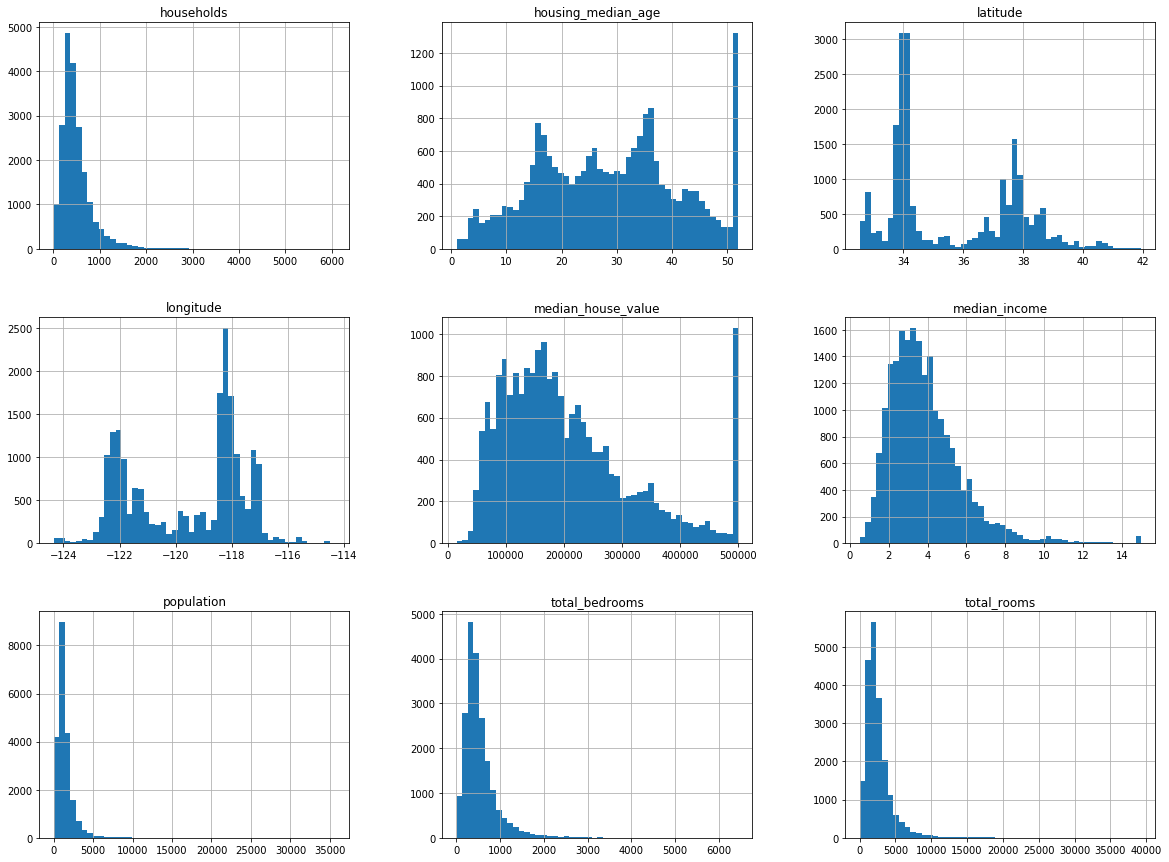

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50,figsize=(20,15))
plt.show()

## Dividindo os dados entre os dados de treino e os dados de teste
## Spliting the data in a training set and a test_set

In [13]:
import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

"""
Uso da função anterior:
"""

train_set, test_set = split_train_test(housing,0.2)
print(len(train_set), "train +", len(test_set), "test")


16512 train + 4128 test


##### A última abordagem seria apropriada se a permutação dos dados nunca mudasse, esse problema pode ser resolvido, se, por exemplo, fosse utilizada uma seed definitiva para as permutações dos dados, como o número 42. Problema resolvido, certo? Bom, o que aconteceria se adicionassemos novas informações entre os dados já conhecidos? A permutação provavelmente iria mudar e você teria diferentes sets de treinamento e de dados durante as execuções dos algoritmos. Chegaria um ponto onde você e seu algorítmo iriam ter visto todos os dados, causando um problema chamado data snooping.

##### The last approach was fine if the random permutation never changes, this can be solved by adding a random_seed, 42 for example, ok then. The problem is solved, right? Well, what if you append some new data to your dataset? Or what if you insert some new data between the existing rows? The permutation would probably change and you would have different permutations at every execution of the algorithm. You would have different tests and training sets everytime you train your model, so you model and yourself would get to know all the data at some point. This would cause a problem called data snooping,

### Para resolver este problema, usaremos um atributo dos dados como um ID, criaremos um hash desse id e assim identificaremos permanentemente os dados mesmo que os mesmos mudem com o decorrer do uso do algoritmo

### To solve this problem, we are going to use an attribute of the data as a ID, we're going to create a hash of that ID and identify permanently the data even if new data instances are added or if the data changes through the use of the program.

In [14]:
import hashlib

def test_set_check(identifier, test_ratio,hash):
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio

def split_train_test_by_id(data, test_ratio, id_column, hash = hashlib.md5):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_ : test_set_check(id_, test_ratio, hash))
    return data.loc[~in_test_set], data.loc[in_test_set]



#### Nosso dataset não contém uma coluna de ID, nós poderíamos criar uma usando a longitude e a latitude, por exemplo:
#### Our dataset doesnt have a ID column, what we could do is creating one using longitude and latitude, for example:

In [15]:
housing_with_id = housing.reset_index() # Adds a index column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

#### Se usarmos o índice das linhas como ID, precisamos ter cuidado para sempre acrescentarmos novos dados apenas no final da lista de dados e não entre as linhas existentes
#### If we use the row index an an ID, we have to be carefull to always add data by appending, and not by inserting between our existing lines

In [16]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

#### Nós também temos a opção de usar a função pronta e já testada do sklearn chamada train_test_split
#### We also have the option of using the already made and battle scarred function train_test_split of the sklearn lib

In [17]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

/home/fuhr/Github/ml/env/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


## Segundo os especialistas, um dado muito ligado ao valor da casa de um distrito é o de salário médio, vamos retirar o set de teste de forma estratificada obedecendo as diferentes categorias de salário_medio
## ...

### Esse atributo não é um atributo numérico, o que pode dificultar bastante a interpretação dos dados pelos nosso algoritmos de Machine Learning
### This attribute isnt a numerical attribute, that can make the learning part harder for our learning algorithms

In [18]:
# Creating a near the sea more numerical categorization
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"] <5, 5.0, inplace=True)

In [19]:
housing["income_cat"].value_counts()

3.0    7236
2.0    6581
4.0    3639
5.0    2362
1.0     822
Name: income_cat, dtype: int64

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 

#### Agora o nosso set de testes é mais representativo de um exemplo de dados reais

In [21]:
### Removing the income_cat for the future training after we got our stratified test set
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

In [22]:
housing = strat_train_set.copy()

### Visualizing geographical data

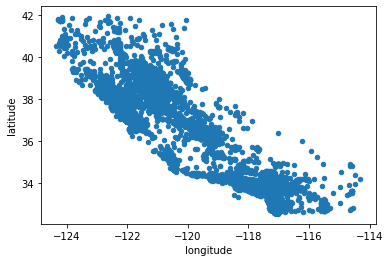

In [23]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude")

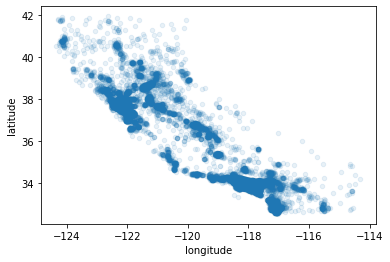

In [24]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)

#### Lets make our graphic more elaborated

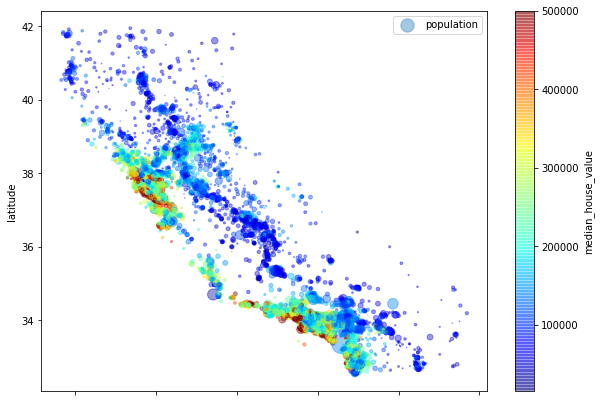

In [25]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "population", figsize = (10, 7),
             c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True)

### If we want to see the simple linear correlations between the the value and the other attribs, we can use a correlation matrix

In [26]:
corr_matrix = housing.corr()

In [27]:
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f26ab5d4668>,
      dtype=object)

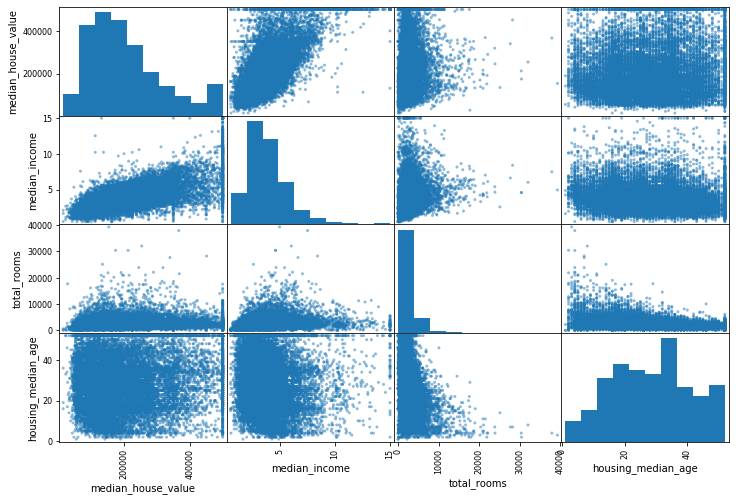

In [28]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize= (12,8))

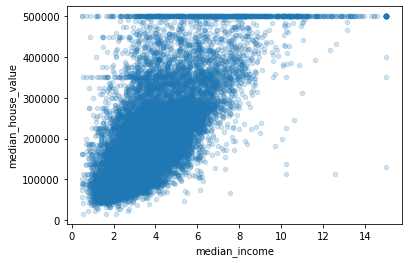

In [29]:
housing.plot(kind = "scatter", x = "median_income",y = "median_house_value",alpha = 0.2)

In [30]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [31]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### We have studied and analized the data, now lets prepare it to the training


In [32]:
# We have the attribute total_bedrooms that isnt in all of our data instances, 
# we have three different options to solve this problem and clean the data:

# 1. Get rid of the corresponding districts
# 2. Get rid of the whole attribute
# 3. Set the values to soem

# housing.dropna(subset= ["total_bedrooms"]) Option 1
# housing.drop("total_bedrooms", axis =1) Option 2
# housing["total_bedrooms"].fillna(median,inplace = True) Option 3


from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

housing_num = housing.drop("ocean_proximity", axis = 1)

imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [33]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.11950000e+03,
        4.33000000e+02,  1.16400000e+03,  4.08000000e+02,  3.54090000e+00,
        1.79500000e+05,  5.23228423e+00,  2.03031374e-01,  2.81765270e+00])

In [34]:
housing_num.median()

longitude                     -118.510000
latitude                        34.260000
housing_median_age              29.000000
total_rooms                   2119.500000
total_bedrooms                 433.000000
population                    1164.000000
households                     408.000000
median_income                    3.540900
median_house_value          179500.000000
rooms_per_household              5.232284
bedrooms_per_room                0.203031
population_per_household         2.817653
dtype: float64

In [35]:
X = imputer.transform(housing_num)

housing_tr = pd.DataFrame(X, columns = housing_num.columns)

## Handling text and categorical attributes

In [87]:
housing_cat = housing['ocean_proximity']
housing_cat.head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [88]:
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_cat_encoded[:10]

array([0, 0, 1, 2, 0, 2, 0, 2, 0, 0])

### The bad thing about this method, its because machine learning algorithms can associate the actual numerical value to some type of meaning, so we are going to use one hot encoding

In [123]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder
categories = housing_cat.factorize()
housing_cat_1hot = encoder.fit_transform(categories[0], categories[1]) 
# housing_cat_1hot
categories[0]


# from sklearn.preprocessing import MultiLabelBinarizer
# label_binarizer = MultiLabelBinarizer()
# housing_cat_reshaped = housing_cat.values.reshape(-1,1)
# housing_cat_1hot = label_binarizer.fit_transform(housing_cat_reshaped)
# print(housing_cat_1hot)
# label_binarizer.classes_
help(_validate_keywords)

AttributeError: 'numpy.ndarray' object has no attribute '_validate_keywords'

### Creating classes that will work seamlessly with sklearn Pipelines is easy and important

# Feature Scaling

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # No *args and kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self,X, y = None):
        return self #Nothing else to do
    
    def transform(self,X,y = None):
        rooms_per_household = X[:,rooms_ix] / X[:,household_ix]
        population_per_household = X[:,population_ix] / X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_atributes = attr_adder.transform(housing.values)
#

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [74]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataframeSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self,X, y =None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names].values

    
num_attribs = list(housing_num)
cat_attribs = housing["ocean_proximity"]

num_pipeline = Pipeline([
    ('selector', DataframeSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder(add_bedrooms_per_room=True)),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataframeSelector(cat_attribs)),
    ('cat_encoder', MultiLabelBinarizer()),
])

In [77]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    #("cat_pipeline", cat_pipeline),
])

In [78]:
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])